In [76]:
import numpy as np
import pandas as pd

import nltk.corpus
import re

import spacy
from spacy.lang.en import English
from pandarallel import pandarallel

from tqdm import tqdm



from IPython.display import Image

---

[Статья оригиниал](https://lena-voita.github.io/nlp_course/word_embeddings.html)

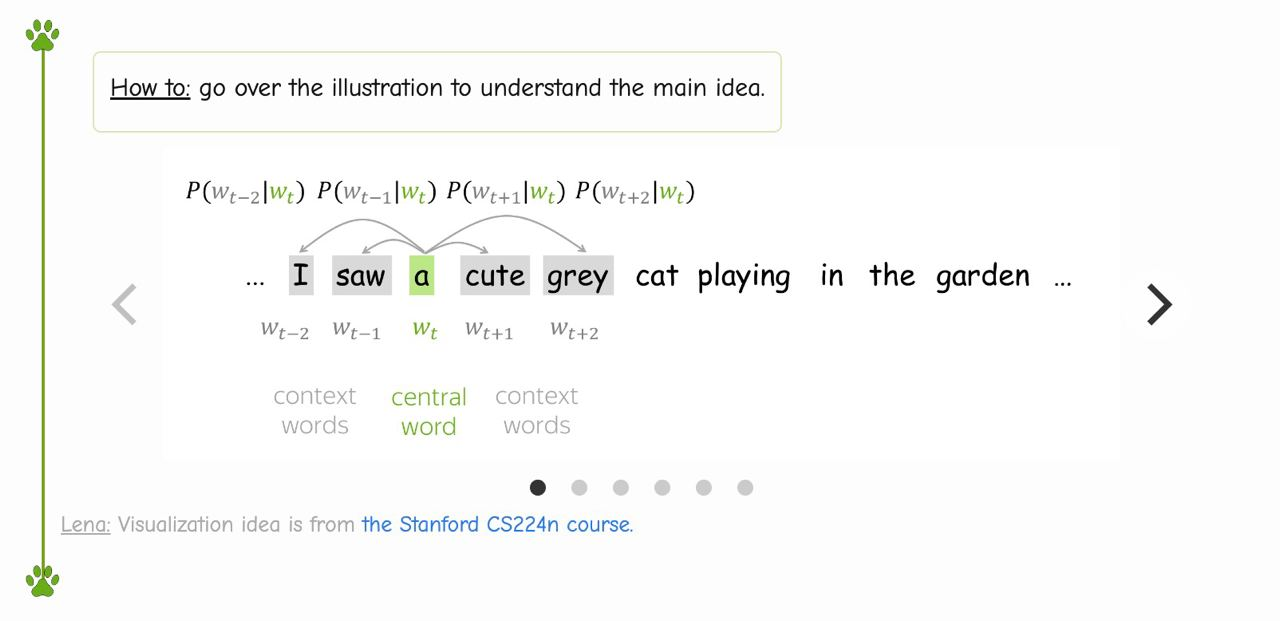

In [52]:
Image('0.jpg')

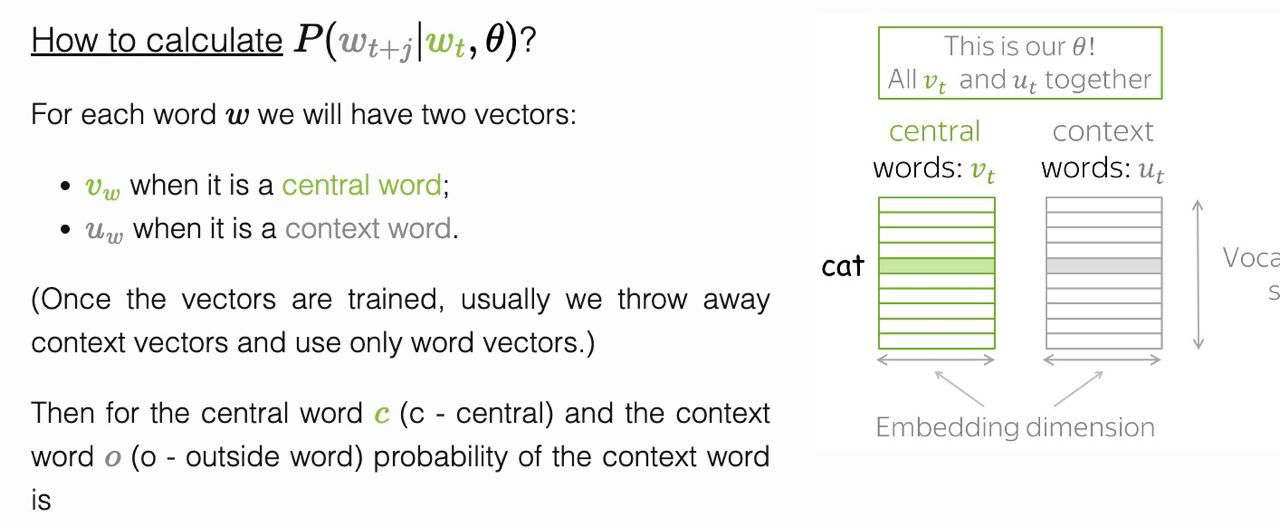

In [47]:
Image('1.jpg')

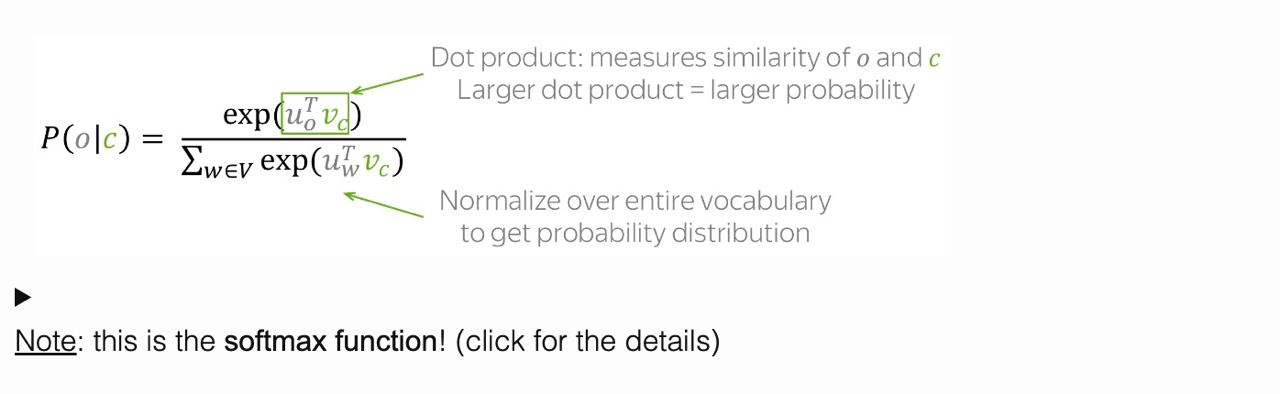

In [48]:
Image('2.jpg')

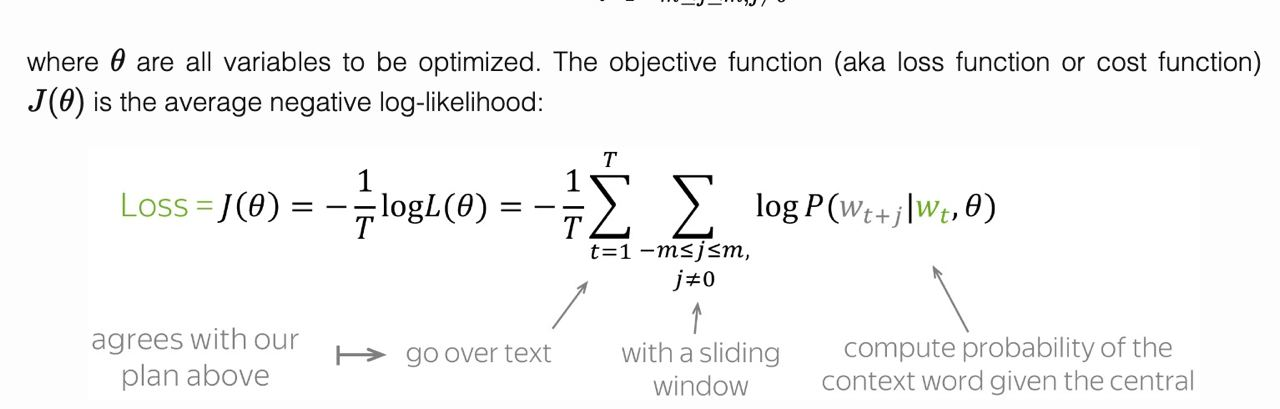

In [49]:
Image('3.jpg')

---

In [9]:
courpuses = pd.read_csv('toxic_comments.csv')
del courpuses['toxic']
del courpuses['Unnamed: 0']
courpuses.sample(5)

,text
133051,"Again, you pushed the issue, so the burden of ..."
158151,"Oh, and just one comment. You added a comment ..."
8804,Isaac Salkeld \n\nIsaac salkeld is a mad fella...
104057,Come to my house right now and do me in the bu...
62283,I do think Ethnic Cleansing is happening in Li...


In [13]:
courpuses.iloc[1]['text']

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

---

In [33]:
def to_lower_letters(text):
    res = ''
    for word in text.split():
        res += ''.join(re.findall(regex, word)).lower() + ' '
    return res

In [35]:
courpuses.text = courpuses.text.apply(to_lower_letters)

In [36]:
courpuses.iloc[1]['text']

'daww he matches this background colour im seemingly stuck with thanks talk  january   utc '

---

In [39]:
text_listed = courpuses.text.apply(lambda text: text.split()).values

In [40]:
text_listed[1]

['daww',
 'he',
 'matches',
 'this',
 'background',
 'colour',
 'im',
 'seemingly',
 'stuck',
 'with',
 'thanks',
 'talk',
 'january',
 'utc']

---

In [57]:
all_words = []
for text in text_listed:
    all_words += list(set(text))
unique_words = set(all_words)

In [59]:
len(unique_words)

226661

- всё фигня, надо нормально обработать

---

- strip удаляет конечные и начальные символы в строке (заданные в параметре)

In [101]:
text_processing_pipeline = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    doc = text_processing_pipeline(text.lower())
    lemmatized_text = ' '.join([token.lemma_ for token in doc if str(token).isalpha()])
    return lemmatized_text

In [102]:
tqdm.pandas()
pandarallel.initialize(progress_bar=True)

courpuses['text'] = courpuses['text'].parallel_apply(lemmatize_text)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [105]:
courpuses.to_pickle('courpuses.pkl')

In [106]:
pd.read_pickle('courpuses.pkl')

,text
0,explanation why the edit make under my usernam...
1,daww he match this background colour I m seemi...
2,hey man I m really not try to edit war its jus...
3,more I can not make any real suggestion on imp...
4,you sir be my hero any chance you remember wha...
...,...
159287,and for the second time of ask when your view ...
159288,you should be ashamed of yourself that be a ho...
159289,spitzer umm there s no actual article for pros...
159290,and it look like it be actually you who put on...


---

In [53]:
dimension = 100